In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#Condiciones iniciales
v0 = 1
nu = 0.2
h = 0.02
R = v0*h/nu
N = 51
#Limites de obstaculo
iMin = 5
jMin = 5
iMax = 25
jMax = 30

x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)  
u = np.zeros((N,N))
w = np.zeros((N,N))
vx = np.zeros((N,N))
vy = np.zeros((N,N))

In [3]:
def vortice(u,w):
            
    for j in range(jMin,jMax+1):
        u[iMin,j], u[iMax,j]=0,0    
        w[iMin,j]= -2*(u[iMin-1,j] - u[iMin,j])/(h**2) #Izquierda
        w[iMax,j] = -2*(u[iMax+1,j] - u[iMax,j])/(h**2) #Derecha
        
    for i in range(iMin,iMax+1):
        w[i,jMax]= -2*(u[i,jMax+1] - u[i,jMax])/(h**2) #Arriba
        w[i,jMin] = -2*(u[i,jMax-1] - u[i,jMax])/(h**2) #Abajo
        u[i,jMin], u[i,jMax] = 0,0


In [4]:
def initu(u):
    for i in range(N):
        u[1,i] = u[0, i]
        u[-1,i] = u[-2,i] 
        u[i,-1] = u[i, -2] + v0*h*y[-1]        
        u[i, 0] = 0  
        
def initw(w):
    for i in range(N):
        w[0,i] = 0
        w[-1,i]= 0
        w[i,-1]= 0 
        w[i, 0]= 0   

In [5]:
def Relaxation(omega=0.9, Nit = 1000):
    for it in tqdm(range(Nit)):
        initu(u)
        initw(w)
        vortice(u,w)
        dmax1 = 0
        dmax2 = 0
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                if (jMax-1>i>jMin+1)and(iMax-1>j>iMin+1):
                    u[i,j], w[i,j] = 0,0
                    
                else:
                    ump = (0.25)*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1] + w[i,j]*(h**2))
                    relax_u = omega*(ump - u[i,j])
                    u[i,j]+=relax_u
                    
                    if np.abs(relax_u) > dmax1:
                        dmax1 = relax_u    
                        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                if (jMax-1>i>jMin+1)and(iMax-1>j>iMin+1):
                    u[i,j], w[i,j] = 0,0                    
                else:
                    wmp=(0.25)*(w[i,j+1]+w[i,j-1]+w[i-1,j]+w[i+1,j])-(R/16)*(u[i,j+1]-u[i,j-1])*(w[i+1,j]-w[i-1,j])+(R/16)*(w[i,j+1]-w[i,j-1])*(u[i+1,j]-u[i-1,j])
                    relax_w = omega*(wmp-w[i,j])
                    w[i,j] += relax_w
                    
                    if np.abs(relax_w) > dmax2:
                        dmax2 = relax_w     
        if (np.abs(dmax1) < 1e-9) and (np.abs(dmax2) < 1e-9):
            break
    #Actualizacion de las velocidades
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            vx[i,j] = (u[i+1,j]-u[i-1,j])/(2*h)
            vy[i,j] = (u[i,j+1]-u[i,j-1])/(2*h)        
Relaxation()


100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 74.22it/s]


<IPython.core.display.Javascript object>


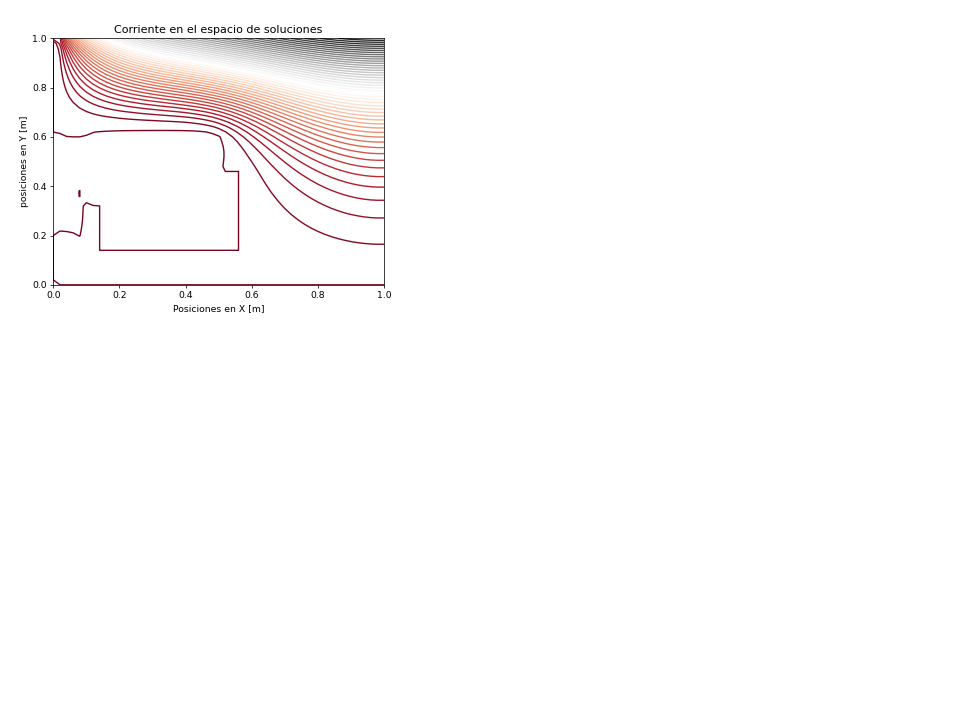

Text(0, 0.5, 'posiciones en Y [m]')

In [9]:
plt.figure()
plt.title("Corriente en el espacio de soluciones")
plt.contour(X,Y,u.T, 50, cmap = "RdGy")
plt.xlabel("Posiciones en X [m]")
plt.ylabel("posiciones en Y [m]")

<IPython.core.display.Javascript object>


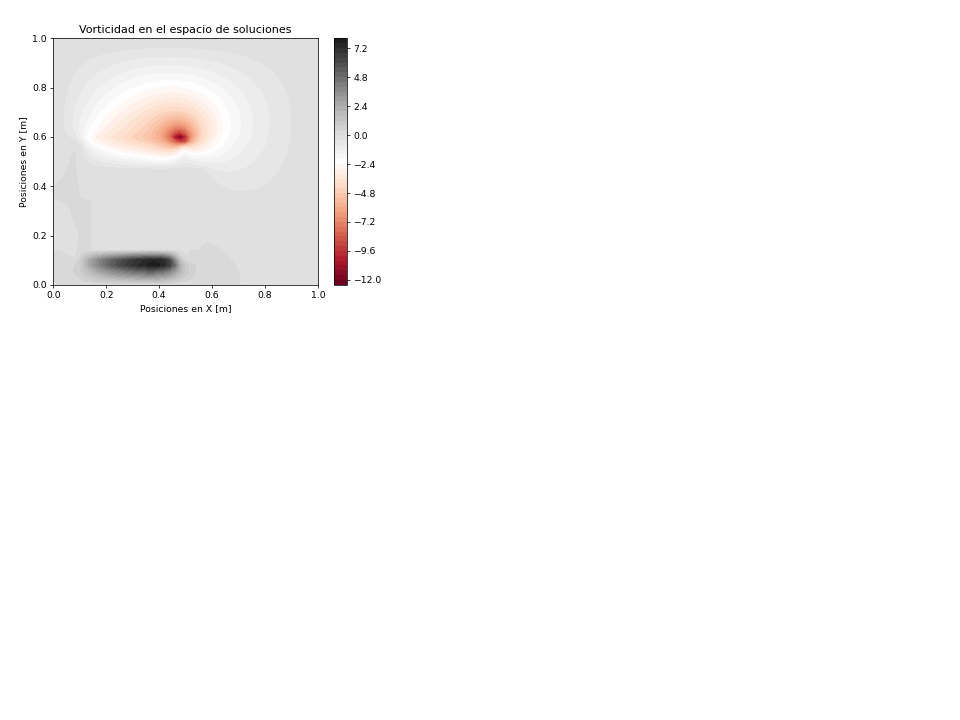

In [10]:
plt.figure()
plt.contourf(X,Y,w.T, 50, cmap = "RdGy")
plt.colorbar()
plt.title("Vorticidad en el espacio de soluciones")
plt.xlabel("Posiciones en X [m]")
plt.ylabel("Posiciones en Y [m]")
plt.show()

<IPython.core.display.Javascript object>


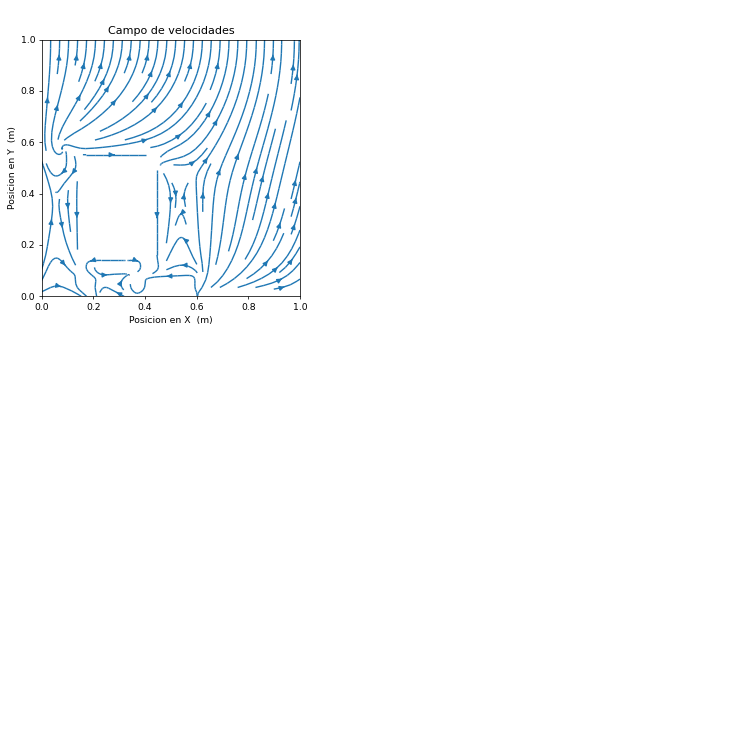

In [11]:
plt.figure(figsize = (5,5))
plt.title("Campo de velocidades")
plt.xlabel("Posicion en X  (m)")
plt.ylabel("Posicion en Y  (m)")
plt.streamplot(X,Y,vx,vy)